In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['OPD_Crimes.csv']


In [2]:
data = pd.read_csv('../input/OPD_Crimes.csv')
data.head()

,Case Number,Case Date Time,Case Location,Case Offense Location Type,Case Offense Category,Case Offense Type,Case Offense Charge Type,Case Disposition,Status,Location,Orlando Main Street Program Area,Orlando Commissioner Districts,Orlando Neighborhoods
0,2010-00800219,01/28/2010 12:47:00 PM,4100 Block of N ORANGE BLOSSOM TL,Construction Site,Theft,All other larceny,Committed,Closed,Unmapped,NaN,NaN,NaN,NaN
1,2010-00800220,01/28/2010 12:54:00 PM,4100 Block of N ORANGE BLOSSOM TL,Industrial/Mfg,Theft,All other larceny,Committed,Closed,Unmapped,NaN,NaN,NaN,NaN
2,2010-00800221,01/28/2010 01:02:00 PM,4100 Block of N ORANGE BLOSSOM TL,Industrial/Mfg,Theft,All other larceny,Committed,Closed,Unmapped,NaN,NaN,NaN,NaN
3,2010-00178297,04/16/2010 12:50:00 PM,4000 Block of N ORANGE BLOSSOM TL,Bus/Rail Terminal,Robbery,Robbery,Committed,Closed,Unmapped,NaN,NaN,NaN,NaN
4,2010-00193916,04/25/2010 06:41:00 PM,4800 Block of PHEASANT RUN DR,Residence/Single,Assault,Simple assault,Committed,Arrest,Unmapped,NaN,NaN,NaN,NaN


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

data.isna().sum()

Case Number                              0
Case Date Time                           2
Case Location                            0
Case Offense Location Type               0
Case Offense Category                    0
Case Offense Type                        0
Case Offense Charge Type                 0
Case Disposition                         0
Status                                   0
Location                              6892
Orlando Main Street Program Area    162374
Orlando Commissioner Districts       14553
Orlando Neighborhoods                14549
dtype: int64

In [4]:
data.drop(['Case Date Time'], axis=1, inplace=True)
data.drop(['Location'], axis=1, inplace=True)
data.drop(['Orlando Main Street Program Area'], axis=1, inplace=True)
data.drop(['Orlando Commissioner Districts'], axis=1, inplace=True)
data.drop(['Orlando Neighborhoods'], axis=1, inplace=True)
data.drop(['Case Number'], axis=1, inplace=True)

data.head()



,Case Location,Case Offense Location Type,Case Offense Category,Case Offense Type,Case Offense Charge Type,Case Disposition,Status
0,4100 Block of N ORANGE BLOSSOM TL,Construction Site,Theft,All other larceny,Committed,Closed,Unmapped
1,4100 Block of N ORANGE BLOSSOM TL,Industrial/Mfg,Theft,All other larceny,Committed,Closed,Unmapped
2,4100 Block of N ORANGE BLOSSOM TL,Industrial/Mfg,Theft,All other larceny,Committed,Closed,Unmapped
3,4000 Block of N ORANGE BLOSSOM TL,Bus/Rail Terminal,Robbery,Robbery,Committed,Closed,Unmapped
4,4800 Block of PHEASANT RUN DR,Residence/Single,Assault,Simple assault,Committed,Arrest,Unmapped


In [5]:
df = data.copy(deep=1)
df.head()

,Case Location,Case Offense Location Type,Case Offense Category,Case Offense Type,Case Offense Charge Type,Case Disposition,Status
0,4100 Block of N ORANGE BLOSSOM TL,Construction Site,Theft,All other larceny,Committed,Closed,Unmapped
1,4100 Block of N ORANGE BLOSSOM TL,Industrial/Mfg,Theft,All other larceny,Committed,Closed,Unmapped
2,4100 Block of N ORANGE BLOSSOM TL,Industrial/Mfg,Theft,All other larceny,Committed,Closed,Unmapped
3,4000 Block of N ORANGE BLOSSOM TL,Bus/Rail Terminal,Robbery,Robbery,Committed,Closed,Unmapped
4,4800 Block of PHEASANT RUN DR,Residence/Single,Assault,Simple assault,Committed,Arrest,Unmapped


In [6]:
df.isna().sum()

Case Location                 0
Case Offense Location Type    0
Case Offense Category         0
Case Offense Type             0
Case Offense Charge Type      0
Case Disposition              0
Status                        0
dtype: int64

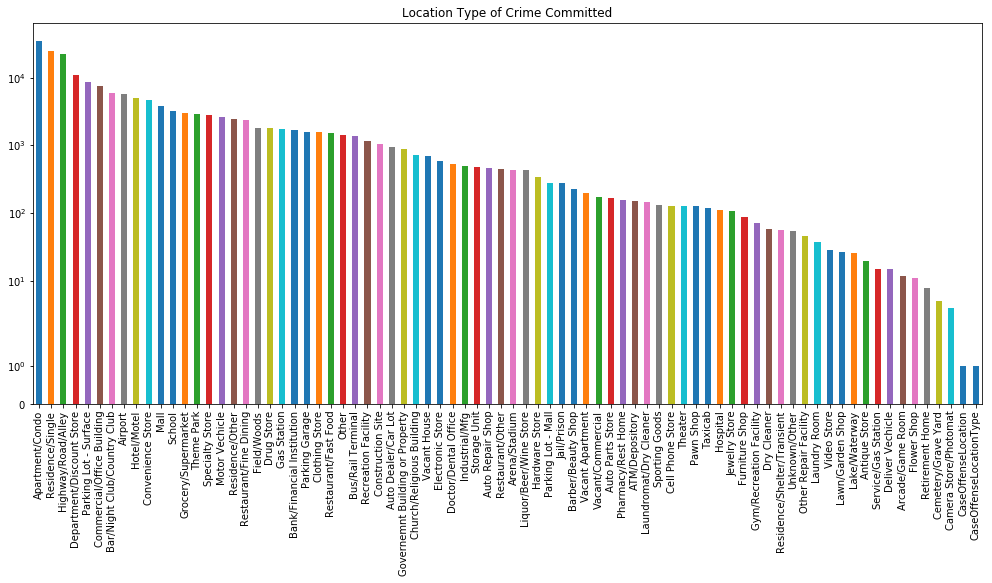

In [7]:
df['Case Offense Location Type'].value_counts().plot(kind='bar')
plt.title('Location Type of Crime Committed')
plt.yscale('symlog')

fig = plt.gcf()
fig.set_size_inches(17, 7)

The bar graph above tells us that the Apartment/Condo has been the most favourite spot for crime in Orlando while the Camera Store/Photomat being the least favourite of the lot.

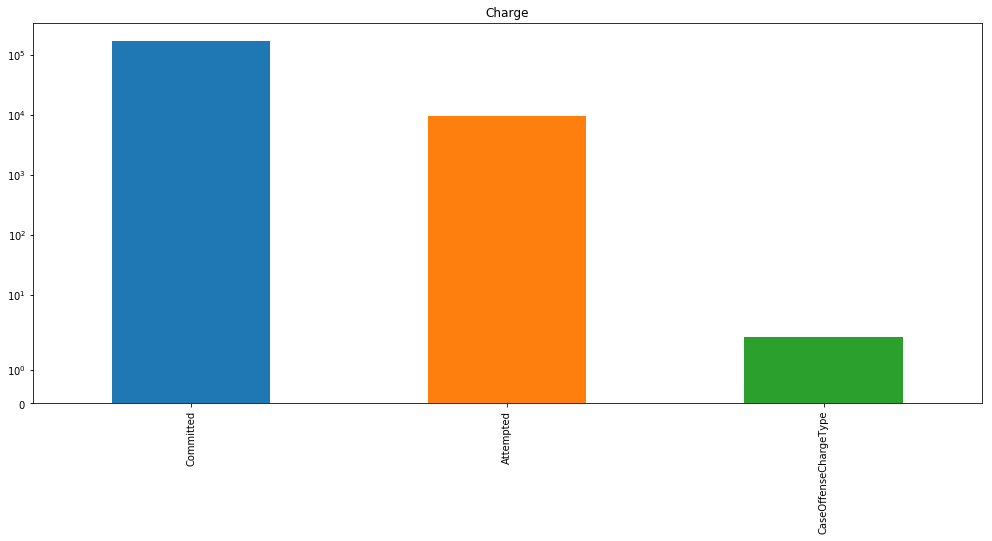

In [8]:
df['Case Offense Charge Type'].value_counts().plot(kind='bar')
plt.title('Charge')
plt.yscale('symlog')

fig = plt.gcf()
fig.set_size_inches(17, 7)

Charge Committed > **10** * Charge Attempted

In [9]:
x = []
x.append(df['Case Offense Charge Type'].value_counts()[0])
x.append(df['Case Offense Charge Type'].value_counts()[1])
x
pielabels = 'COMMITTED','ATTEMPTED'

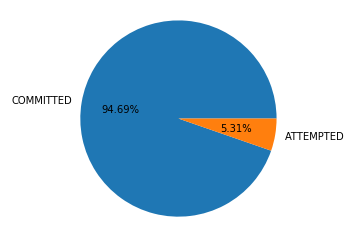

In [10]:
plt.pie(x, labels=pielabels, autopct='%1.2f%%')

plt.axis('equal')
plt.show()

In [11]:
c = []
df['Case Disposition'].value_counts()

Closed             129792
Arrest              39913
Inactive             8735
Open                 2818
CaseDisposition         2
Name: Case Disposition, dtype: int64

In [12]:
c1 = df['Case Disposition'].value_counts()[0]
c2 = df['Case Disposition'].value_counts()[1]
c3 = df['Case Disposition'].value_counts()[2]
c4 = df['Case Disposition'].value_counts()[3]
explode = [0,0,0,0.5]
l = [c1,c2,c3,c4]
labels = 'Closed','Arrest','Inactive','Open'

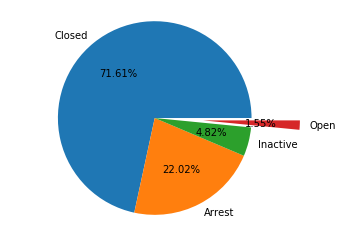

In [13]:
plt.pie(l, labels=labels, autopct='%1.2f%%', explode=explode)

plt.axis('equal')
plt.show()

Majority of the cases have been **closed**. While almost 5% of the cases remain inactive, less than 2% of the cases are still pending.

In [14]:
s = df['Case Offense Category'].value_counts()

In [15]:
s

Theft                  89766
Burglary               25905
Assault                19833
Narcotics              19513
Fraud                  11681
Vehicle Theft           8936
Robbery                 5106
Arson                    243
Homicide                 141
Kidnapping                92
Embezzlement              40
CaseOffenseCategory        2
Bribery                    2
Name: Case Offense Category, dtype: int64

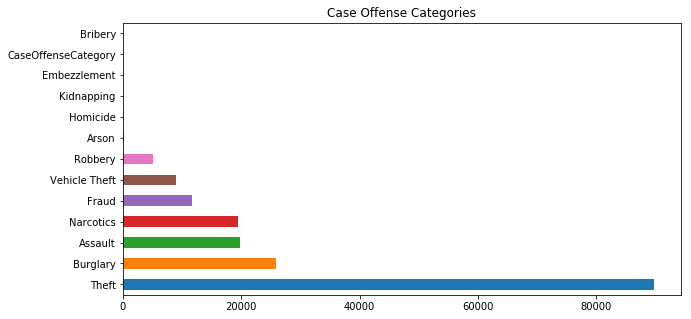

In [16]:
s.plot(kind='barh')
plt.title('Case Offense Categories')

fig = plt.gcf()
fig.set_size_inches(10, 5)

**Theft** dominates the total offenses that were committed in all the cases by almost 4 times the second most committed crime i.e. **Burglary**.

In [17]:
df['Case Offense Type'].value_counts()

All other larceny                                    47189
Burglary/breaking and entering                       25905
Theft from motor vehicle except parts/accessories    21453
Shoplifting                                          18151
Drugs/narcotics                                      17685
Simple assault                                       16081
Motor vehicle theft                                   8936
False pretense/swindle/confidence game                8239
Robbery                                               5106
Aggravated assault                                    3752
Credit card/atm fraud                                 3417
Drug equipment                                        1828
Pocket picking                                        1818
Theft from building                                    515
Purse snatching                                        455
Arson                                                  243
Theft from coin-operated machine or device             1

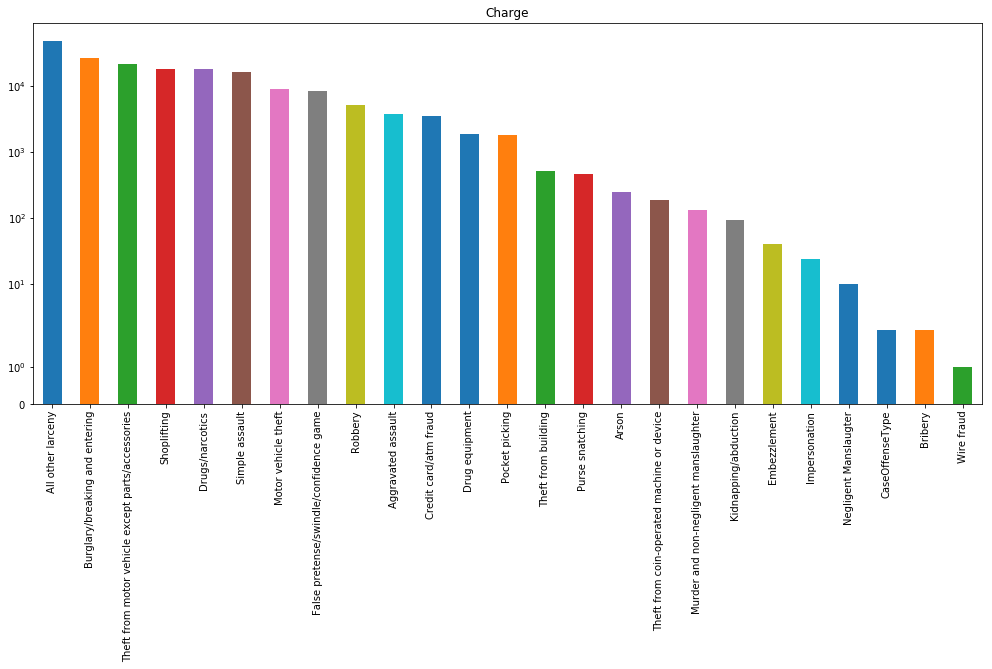

In [18]:
df['Case Offense Type'].value_counts().plot(kind='bar')
plt.title('Charge')
plt.yscale('symlog')

fig = plt.gcf()
fig.set_size_inches(17, 7)

Larceny has occurred more than 10000 times than incidents of wire frauds have occurred. It is essential to note that Burglary and Theft are among the top 3 contenders with neck-to-neck values of their incidents. 